# Mean and standard deviation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

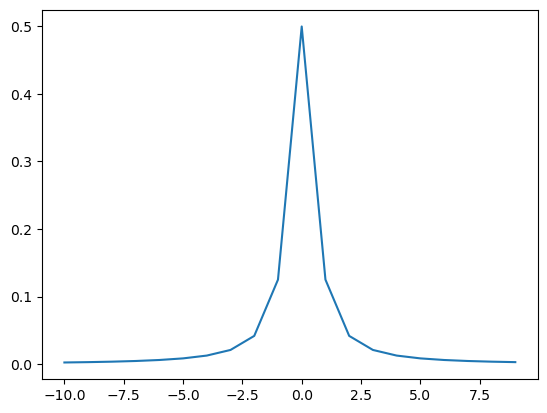

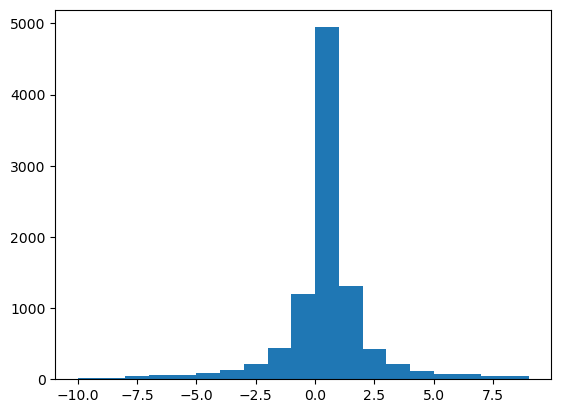

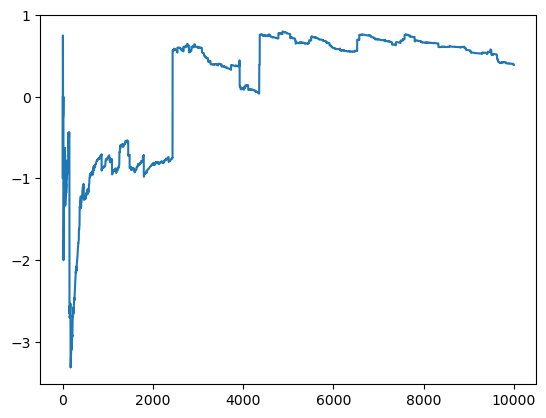

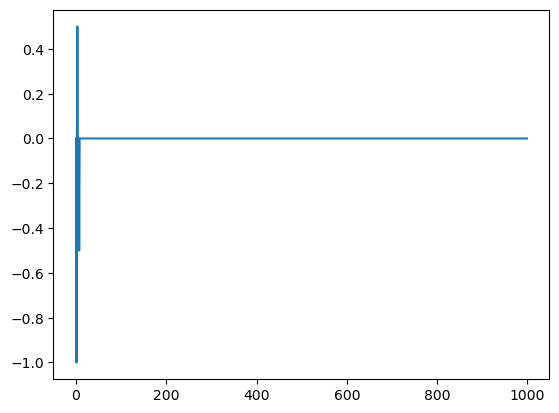

In [2]:
import random
import datetime
from statistics import median
from statistics import mean
from collections import Counter

N = 10_000

#point 3
def f(k):
    if k == 0:
        return 0.5
    return 1 /(4 * abs(k) * (abs(k) + 1))

sample = [f(k) for k in range(-10, 10)]    
plt.plot(range(-10,10), sample)
plt.show()


#point 4
def randWDistr():
    y = np.random.rand(N)
    vec = np.zeros(N)
    vec[y >= 0.5] = np.ceil(1 / np.random.random(np.sum(y >= 0.5))) - 1
    vec[(0.5 < y) & (y <= 0.75)] *= -1
    return vec

sampled = np.fromfunction(randWDistr, ())
plt.hist(sampled, bins=range(-10, 10))
plt.show()


#point 6,7
wDistr = sampled
pref = []
sum = 0
for i in range(N):
    sum += wDistr[i]
    pref.append(sum / (i + 1))
    
plt.plot(pref)
plt.show()


#point 8,9
part = []
x_median = []
for i in range(1000):
    part.append(wDistr[i])
    x_median.append(median(part))
    
plt.plot(x_median)
plt.show()

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.